# STAT 450: Case Studies in Statistics

## Case study: relation between mRNA and protein levels

The picture illustrates what is known as the Central Dogma of Biology


![](prot_gene.png)

Despite expectations of a high correlation between mRNA and protein levels, experimental results have shown very low correlation values

Many research groups have investigated the relation between mRNA and protein levels. 

In 2014, a research group claimed to find a "predictive model", which can be used to predict protein from mRNA!!

We'll use data from this group submitted to the Journal as if it is "our client's data"


### Claim

Using the median ratio of protein to mRNA levels per gene as a proxy for translation rates, our data show that [...] ***it now becomes possible to predict protein abundance in any given tissue with good accuracy from the measured mRNA abundance***

### Question

- Is our analysis statistically correct?

- Is there another way to analyze the data? If so, do we get similar results?


![](nature_res.png)

# Let's take a look at their data

### Can we reproduce their analysis?

### Do we get the same conclusions?

## From The Art of Data Science (by Peng and Matsui)

### Exploratory Data Analysis: Checklist

1. Formulate your question
2. Read in your data
3. Check the packaging

### Checklist for The Art of Data Science (cont.)


4. Look at the top and the bottom of your data
5. Check your “n”s
6. Validate with at least one external data source
7. Make a plot
8. Try the easy solution first
9. Follow up

## 1. Formulate your question

### Your questions to the client

- Assumptions made when analyzing/collecting data
    - independent, from different people
    - model used to predict
- How was the data collected? selection of participants?

- Why the median ratio as a proxy?

- Any demographics we should be awared of?

- How many replicates you have?

- Why missing values?? 
    - does missing represent "no expression, level=0"?
    - does it mean low level and the technology can't read it iin?
    - does it carry any additional information?

## 2. Read in your data (and load packages)

In [1]:
library(tidyverse)
#library(repr)
#options(repr.plot.width=7, repr.plot.height=4)
library(ggplot2)
library(broom)
#library(gridExtra)
#library(GGally)

prot <- data.matrix(read.csv("proteinUN.csv", row.names = 1))
mrna <- data.matrix(read.csv("geneUN.csv", row.names = 1))
tissues <- colnames(mrna)
genes <- proteins <-rownames(prot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## 3. Check the packaging

In [2]:
#quick checks
stopifnot(all(colnames(prot) == colnames(mrna)))
stopifnot(all(rownames(prot) == rownames(mrna)))

In [3]:
#learning about tissues
str(tissues)
tissues

 chr [1:12] "uterus" "kidney" "testis" "pancreas" "stomach" "prostate" ...


[1] "uterus"         "kidney"         "testis"         "pancreas"      
 [5] "stomach"        "prostate"       "ovary"          "thyroid.gland" 
 [9] "adrenal.gland"  "salivary.gland" "spleen"         "esophagus"

### Aim: for each gene, we want to compare mRNA with protein levels.

For each gene, this information is at rows of the `mrna` and `prot` dataframes. 

So we can grab those rows (1-by-1) and measure their correlation or create a dataframe

In [4]:
x_419 <- mrna[rownames(mrna)=="ENSG00000000419",]
y_419 <- prot[rownames(prot)=="ENSG00000000419",]
dat_419 <- data.frame(x=x_419, y=y_419)

In [5]:
dat_419

,x,y
,<dbl>,<dbl>
uterus,3.44e-05,9.966484e-06
kidney,3.43e-05,1.894265e-05
testis,3.80e-05,4.257907e-05
pancreas,2.11e-05,1.575567e-06
stomach,2.96e-05,3.282342e-05
prostate,3.40e-05,2.119753e-05
ovary,3.17e-05,3.916784e-05
thyroid.gland,4.54e-05,3.930635e-06
adrenal.gland,5.01e-05,1.016500e-05


In [7]:
cor(x_419,y_419)
dat_419 %>% summarize(cor(x,y))

[1] -0.204297

"cor(x, y)"
<dbl>
-0.204297


Let's check that we have put rows of `prot` and `mrna` into columns of `dat_419`

In [8]:
head(prot,3)

,uterus,kidney,testis,pancreas,stomach,prostate,ovary,thyroid.gland,adrenal.gland,salivary.gland,spleen,esophagus
ENSG00000000003,NA,NA,NA,NA,9.157831e-07,NA,NA,NA,NA,9.027262e-06,NA,NA
ENSG00000000419,9.966484e-06,1.894265e-05,4.257907e-05,1.575567e-06,3.282342e-05,2.119753e-05,3.916784e-05,3.930635e-06,1.016500e-05,4.048574e-05,5.092213e-06,1.607405e-05
ENSG00000000457,NA,NA,6.752985e-07,4.704207e-07,3.745549e-06,NA,NA,NA,3.059918e-07,7.894253e-06,NA,NA


In [10]:
head(mrna,3)

,uterus,kidney,testis,pancreas,stomach,prostate,ovary,thyroid.gland,adrenal.gland,salivary.gland,spleen,esophagus
ENSG00000000003,2.50e-05,4.44e-05,5.79e-05,1.43e-05,2.01e-05,3.04e-05,5.60e-05,3.04e-05,2.16e-05,5.58e-05,9.90e-06,4.76e-05
ENSG00000000419,3.44e-05,3.43e-05,3.80e-05,2.11e-05,2.96e-05,3.40e-05,3.17e-05,4.54e-05,5.01e-05,2.44e-05,2.96e-05,4.28e-05
ENSG00000000457,7.80e-06,6.80e-06,7.60e-06,4.10e-06,7.70e-06,8.60e-06,8.20e-06,8.20e-06,6.60e-06,6.50e-06,7.40e-06,7.20e-06


In [9]:
head(dat_419,3)

,x,y
,<dbl>,<dbl>
uterus,3.44e-05,9.966484e-06
kidney,3.43e-05,1.894265e-05
testis,3.80e-05,4.257907e-05


### Limitation: the problem is that we have about 6K genes !!

So manually creating these datasets is not a good approach.

### Per gene or across genes??

A student noticed that we can also study the correlation per tissue, across genes!! We have more data points if we do so!!

Let's try it for "kidney"!

In [13]:
x_kidney <- mrna[,colnames(mrna)=="kidney"]
y_kidney <- prot[,colnames(prot)=="kidney"]
dat_kidney <- data.frame(x=x_kidney, y=y_kidney)
dim(dat_kidney)
head(dat_kidney)

[1] 6104    2

,x,y
,<dbl>,<dbl>
ENSG00000000003,4.44e-05,NA
ENSG00000000419,3.43e-05,1.894265e-05
ENSG00000000457,6.80e-06,NA
ENSG00000000971,1.93e-05,3.358335e-04
ENSG00000001036,5.39e-05,9.711970e-07
ENSG00000001084,2.27e-05,1.967169e-05


In [16]:
cor(dat_kidney$x,dat_kidney$y,use="complete.obs")

[1] 0.05518435

### Epicycle: new question for the client!!

Do you want to look at correlations *per genes* (n <= 12) or *across genes* (n <= 6104)??

Intersting paper on this topic that discusses these 2 options: On the Dependency of Cellular Protein Levels on mRNA Abundance. Liu Y, Beyer A, Aebersold R. *Cell* 165(3):535-50. doi: 10.1016/j.cell.2016.03.014

## 4. Look at the top and the bottom of your data

In [17]:
#Looking at the top and bottom

head(prot,3)
tail(prot,3)

head(mrna,3)
tail(mrna,3)

,uterus,kidney,testis,pancreas,stomach,prostate,ovary,thyroid.gland,adrenal.gland,salivary.gland,spleen,esophagus
ENSG00000000003,NA,NA,NA,NA,9.157831e-07,NA,NA,NA,NA,9.027262e-06,NA,NA
ENSG00000000419,9.966484e-06,1.894265e-05,4.257907e-05,1.575567e-06,3.282342e-05,2.119753e-05,3.916784e-05,3.930635e-06,1.016500e-05,4.048574e-05,5.092213e-06,1.607405e-05
ENSG00000000457,NA,NA,6.752985e-07,4.704207e-07,3.745549e-06,NA,NA,NA,3.059918e-07,7.894253e-06,NA,NA


,uterus,kidney,testis,pancreas,stomach,prostate,ovary,thyroid.gland,adrenal.gland,salivary.gland,spleen,esophagus
ENSG00000269190,1.803568e-06,1.402511e-05,2.034178e-06,1.091202e-06,1.650044e-05,3.441421e-06,5.647713e-06,6.894839e-07,2.460341e-05,3.089573e-05,1.067625e-05,3.703505e-06
ENSG00000271303,4.685853e-06,NA,2.669675e-06,NA,NA,5.633086e-06,6.527088e-06,2.554554e-06,1.873942e-05,NA,NA,1.312187e-05
ENSG00000272325,2.001929e-05,6.376470e-06,6.180226e-05,1.402270e-05,5.605276e-05,7.248613e-05,1.571054e-04,3.089959e-05,1.282666e-05,3.657967e-05,1.566443e-05,2.574201e-05


,uterus,kidney,testis,pancreas,stomach,prostate,ovary,thyroid.gland,adrenal.gland,salivary.gland,spleen,esophagus
ENSG00000000003,2.50e-05,4.44e-05,5.79e-05,1.43e-05,2.01e-05,3.04e-05,5.60e-05,3.04e-05,2.16e-05,5.58e-05,9.90e-06,4.76e-05
ENSG00000000419,3.44e-05,3.43e-05,3.80e-05,2.11e-05,2.96e-05,3.40e-05,3.17e-05,4.54e-05,5.01e-05,2.44e-05,2.96e-05,4.28e-05
ENSG00000000457,7.80e-06,6.80e-06,7.60e-06,4.10e-06,7.70e-06,8.60e-06,8.20e-06,8.20e-06,6.60e-06,6.50e-06,7.40e-06,7.20e-06


,uterus,kidney,testis,pancreas,stomach,prostate,ovary,thyroid.gland,adrenal.gland,salivary.gland,spleen,esophagus
ENSG00000269190,2.01e-05,3.22e-05,4.8e-06,5.4e-06,2.3e-06,1.52e-05,2.62e-05,1.90e-06,4.80e-06,6.20e-06,3.40e-06,7.80e-06
ENSG00000271303,1.14e-05,1.55e-05,9.8e-06,6.3e-06,1.6e-05,1.28e-05,1.40e-05,1.63e-05,3.37e-05,1.17e-05,8.50e-06,2.93e-05
ENSG00000272325,1.33e-05,1.37e-05,9.5e-06,5.1e-06,9.4e-06,1.10e-05,1.71e-05,2.54e-05,1.20e-05,7.80e-06,1.43e-05,1.35e-05


## 5. Check your “n”s

In [18]:
#checking dimension
dim(prot)
dim(mrna)

[1] 6104   12

[1] 6104   12

## 6. Validate with at least one external data source

If  you check the plot given by your client, you'll notice that the scale of your data is different from those in the plot.

**You should ask your client how the data was transformed for the plot and why.**

## 7. Make a plot

Per gene, count number of tissues with *both* mRNA and protein values (number of complete pairs per row)

**Note**: this is not the only way to explore the data!

In [9]:
values.available <- sapply(genes, function(p){
  return(sum(!is.na(prot[p,]) & !is.na(mrna[p,])))
})
names(values.available) <- genes
head(values.available,3)

ENSG00000000003 ENSG00000000419 ENSG00000000457 
              2              12               5

### Let's try to join the two dataframes

Having a joint dataframe will ease our exploratory data analysis (EDA) and visualization

1. Let's first add `gene` and `values.available` as variables in the dataframes. 

> These variables will be useful to match and filter dataframes!

In [10]:
#add gene name and count of complete pairs as a variables
dat_prot <- data.frame(prot,gene=rownames(prot))  %>% mutate(values.available = values.available)  

#retain genes with more than 2 complete pairs
dat_prot <- dat_prot %>% filter(values.available > 2)
head(dat_prot)

uterus,kidney,testis,pancreas,stomach,prostate,ovary,thyroid.gland,adrenal.gland,salivary.gland,spleen,esophagus,gene,values.available
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
9.966484e-06,1.894265e-05,4.257907e-05,1.575567e-06,3.282342e-05,2.119753e-05,3.916784e-05,3.930635e-06,1.016500e-05,4.048574e-05,5.092213e-06,1.607405e-05,ENSG00000000419,12
NA,NA,6.752985e-07,4.704207e-07,3.745549e-06,NA,NA,NA,3.059918e-07,7.894253e-06,NA,NA,ENSG00000000457,5
3.633516e-05,3.358335e-04,1.848077e-04,2.956261e-04,1.561922e-04,1.848922e-04,2.033825e-04,7.749283e-05,1.049859e-04,1.306766e-04,1.150577e-04,5.391352e-04,ENSG00000000971,12
1.681633e-05,9.711970e-07,4.784997e-05,NA,3.802391e-06,NA,NA,NA,2.015687e-05,1.048615e-06,1.547352e-05,NA,ENSG00000001036,7
1.693588e-05,1.967169e-05,1.012590e-05,2.687924e-05,1.255965e-04,3.874807e-05,1.274565e-05,1.077153e-05,1.634470e-05,4.268563e-05,1.111609e-04,1.012831e-04,ENSG00000001084,12
3.382920e-06,1.161828e-06,7.014288e-05,NA,3.494310e-05,3.506882e-06,NA,NA,1.402185e-04,4.083306e-06,NA,NA,ENSG00000001630,7


In [11]:
#retain the same genes in both dataframes
dat_mrna <- data.frame(mrna,gene=rownames(mrna))  %>% filter(gene %in% dat_prot$gene)
head(dat_mrna)

uterus,kidney,testis,pancreas,stomach,prostate,ovary,thyroid.gland,adrenal.gland,salivary.gland,spleen,esophagus,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.44e-05,3.43e-05,3.80e-05,2.11e-05,2.96e-05,3.40e-05,3.17e-05,4.54e-05,5.01e-05,2.44e-05,2.96e-05,4.28e-05,ENSG00000000419
7.80e-06,6.80e-06,7.60e-06,4.10e-06,7.70e-06,8.60e-06,8.20e-06,8.20e-06,6.60e-06,6.50e-06,7.40e-06,7.20e-06,ENSG00000000457
1.42e-05,1.93e-05,1.89e-05,6.90e-06,4.71e-05,2.42e-05,2.42e-05,3.31e-05,4.53e-05,2.23e-05,1.14e-05,6.76e-05,ENSG00000000971
3.46e-05,5.39e-05,1.90e-05,2.34e-05,4.75e-05,2.98e-05,3.45e-05,4.54e-05,4.73e-05,1.65e-05,2.94e-05,2.05e-05,ENSG00000001036
1.92e-05,2.27e-05,1.26e-05,6.90e-06,2.95e-05,2.39e-05,6.20e-06,2.76e-05,1.87e-05,9.40e-06,3.43e-05,3.03e-05,ENSG00000001084
1.43e-05,2.00e-05,4.83e-05,1.45e-05,2.98e-05,2.93e-05,1.56e-05,1.88e-05,3.86e-05,7.80e-06,9.00e-06,2.23e-05,ENSG00000001630


2. Convert each dataframe to long-format

> wide-to-long: rows of protein values (and mrna values) will be converted into columns! 

> check the `gather` function from `dplyr`

In [12]:
#use function `gather` to convert from wide to long format
prot_long <- gather(dat_prot, tissue, prot, uterus:esophagus, factor_key=TRUE)
dim(dat_prot)

[1] 4824   14

You can see that all uterus samples come first, then kidney and so on... 

> you can re-order the dataframe and see all samples from the same gene together

In [14]:
prot_long[4820:4830,]

,gene,values.available,tissue,prot
,<fct>,<int>,<fct>,<dbl>
4820,ENSG00000262814,8,uterus,7.439914e-07
4821,ENSG00000267673,7,uterus,NA
4822,ENSG00000269190,12,uterus,1.803568e-06
4823,ENSG00000271303,7,uterus,4.685853e-06
4824,ENSG00000272325,12,uterus,2.001929e-05
4825,ENSG00000000419,12,kidney,1.894265e-05
4826,ENSG00000000457,5,kidney,NA
4827,ENSG00000000971,12,kidney,3.358335e-04
4828,ENSG00000001036,7,kidney,9.711970e-07


Same for mrna ...

In [16]:
mrna_long <- gather(dat_mrna, tissue, mrna, uterus:esophagus, factor_key=TRUE)
mrna_long[4820:4830,]

,gene,tissue,mrna
,<fct>,<fct>,<dbl>
4820,ENSG00000262814,uterus,1.65e-05
4821,ENSG00000267673,uterus,1.21e-05
4822,ENSG00000269190,uterus,2.01e-05
4823,ENSG00000271303,uterus,1.14e-05
4824,ENSG00000272325,uterus,1.33e-05
4825,ENSG00000000419,kidney,3.43e-05
4826,ENSG00000000457,kidney,6.80e-06
4827,ENSG00000000971,kidney,1.93e-05
4828,ENSG00000001036,kidney,5.39e-05


Quick check!

In [19]:
prot_long[4820:4830,]
mrna_long[4820:4830,]

,gene,values.available,tissue,prot
,<fct>,<int>,<fct>,<dbl>
4820,ENSG00000262814,8,uterus,7.439914e-07
4821,ENSG00000267673,7,uterus,NA
4822,ENSG00000269190,12,uterus,1.803568e-06
4823,ENSG00000271303,7,uterus,4.685853e-06
4824,ENSG00000272325,12,uterus,2.001929e-05
4825,ENSG00000000419,12,kidney,1.894265e-05
4826,ENSG00000000457,5,kidney,NA
4827,ENSG00000000971,12,kidney,3.358335e-04
4828,ENSG00000001036,7,kidney,9.711970e-07


,gene,tissue,mrna
,<fct>,<fct>,<dbl>
4820,ENSG00000262814,uterus,1.65e-05
4821,ENSG00000267673,uterus,1.21e-05
4822,ENSG00000269190,uterus,2.01e-05
4823,ENSG00000271303,uterus,1.14e-05
4824,ENSG00000272325,uterus,1.33e-05
4825,ENSG00000000419,kidney,3.43e-05
4826,ENSG00000000457,kidney,6.80e-06
4827,ENSG00000000971,kidney,1.93e-05
4828,ENSG00000001036,kidney,5.39e-05


3. Join dataframes

> check the `full_join` function in `dplyr`

In [20]:
dat_sel <- prot_long  %>%  full_join(mrna_long, by = c("gene","tissue"))
head(dat_sel,2)

gene,values.available,tissue,prot,mrna
<fct>,<int>,<fct>,<dbl>,<dbl>
ENSG00000000419,12,uterus,9.966484e-06,3.44e-05
ENSG00000000457,5,uterus,NA,7.80e-06


Quick check!

In [31]:
dat_sel  %>% filter(gene=="ENSG00000000419") %>% head()
head(dat_419)

gene,values.available,tissue,prot,mrna
<fct>,<int>,<fct>,<dbl>,<dbl>
ENSG00000000419,12,uterus,9.966484e-06,3.44e-05
ENSG00000000419,12,kidney,1.894265e-05,3.43e-05
ENSG00000000419,12,testis,4.257907e-05,3.80e-05
ENSG00000000419,12,pancreas,1.575567e-06,2.11e-05
ENSG00000000419,12,stomach,3.282342e-05,2.96e-05
ENSG00000000419,12,prostate,2.119753e-05,3.40e-05


,x,y
,<dbl>,<dbl>
uterus,3.44e-05,9.966484e-06
kidney,3.43e-05,1.894265e-05
testis,3.80e-05,4.257907e-05
pancreas,2.11e-05,1.575567e-06
stomach,2.96e-05,3.282342e-05
prostate,3.40e-05,2.119753e-05


### Check the "n"s again!!

In [32]:
genes_valid <- dat_sel  %>% select(gene)  %>% unique() 
genes_valid %>% glimpse()

Observations: 4,824
Variables: 1
$ gene <fct> ENSG00000000419, ENSG00000000457, ENSG00000000971, ENSG000000010…


In [33]:
#Check using original dataframes
nrow(dat_prot)
nrow(dat_mrna)

[1] 4824

[1] 4824

# Make a plot!

### Plot gene ENSG00000000419 which has complete information	

In [34]:
dat_1 <- dat_sel  %>% subset(gene=="ENSG00000000419")
dat_1

,gene,values.available,tissue,prot,mrna
,<fct>,<int>,<fct>,<dbl>,<dbl>
1,ENSG00000000419,12,uterus,9.966484e-06,3.44e-05
4825,ENSG00000000419,12,kidney,1.894265e-05,3.43e-05
9649,ENSG00000000419,12,testis,4.257907e-05,3.80e-05
14473,ENSG00000000419,12,pancreas,1.575567e-06,2.11e-05
19297,ENSG00000000419,12,stomach,3.282342e-05,2.96e-05
24121,ENSG00000000419,12,prostate,2.119753e-05,3.40e-05
28945,ENSG00000000419,12,ovary,3.916784e-05,3.17e-05
33769,ENSG00000000419,12,thyroid.gland,3.930635e-06,4.54e-05
38593,ENSG00000000419,12,adrenal.gland,1.016500e-05,5.01e-05


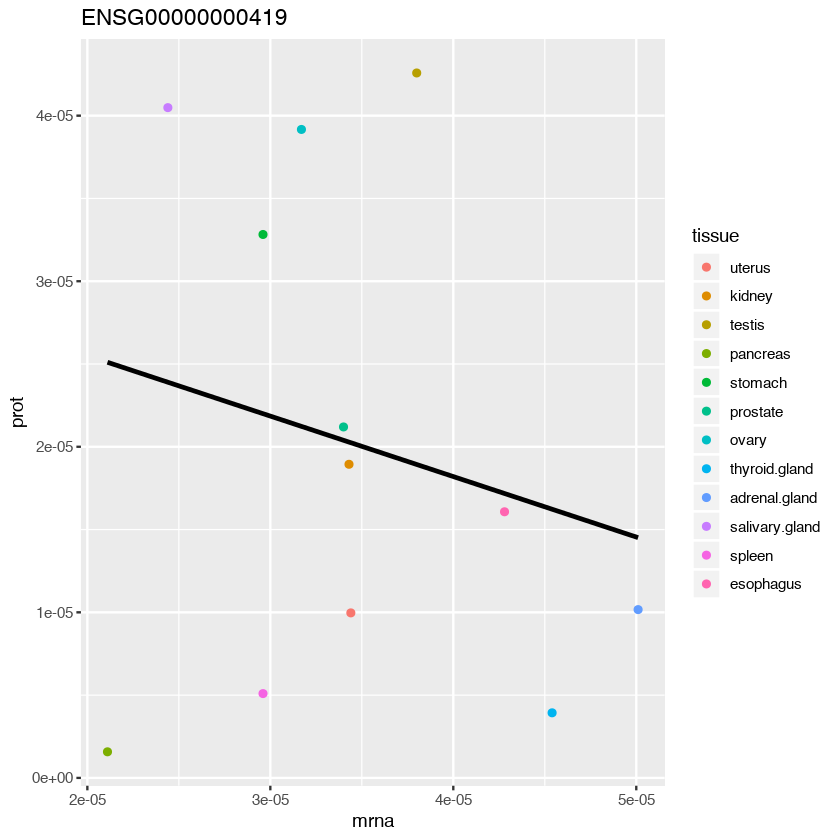

In [35]:
p1 <- ggplot(dat_1,aes(mrna,prot)) + 
        geom_point(aes(mrna,prot,color=tissue),na.rm = T) + ggtitle("ENSG00000000419") + 
        geom_smooth(method = lm, se = FALSE, na.rm=T, color="black")
p1

### To do: randomly pick another gene with complete data

1. how many genes with complete pairs are measured?
2. use set.seed(450) to randomly select one gene
3. save the dataframe into dat_2
4. save the plot as p2

In [59]:
# create a subset of genes with complete data 
dat_12 <- dat_sel  %>% subset(values.available == 12)

# you should see 1392 genes with complete data
sum(values.available == 12)

[1] 1392

### Clarification about subset and factors

Some students tried to sample from the levels of `gene`

> **Note**: even when you create a subset, all levels of the original factors are retained

In our case, `gene` is a factor. Even if `dat_12` has only a subset of genes, the factor `gene` retains all levels from the original dataset `dat_sel`

Thus, the number of levels of the factor `gene` is different from the number of genes in `dat_12`

In [56]:
length(levels(dat_12$gene))

[1] 6104

But there are not so many genes in `dat_12`!!

In [57]:
dat_12  %>% select(gene) %>% unique() %>% glimpse()  

Observations: 1,392
Variables: 1
$ gene <fct> ENSG00000000419, ENSG00000000971, ENSG00000001084, ENSG000000025…


So if you sample from these levels,  you are choosing any gene in the original dataset, not just from those in `dat_12`!!

To solve this problem, you can drop the levels after subsetting your data

In [58]:
dat_12 <- dat_sel  %>% subset(values.available == 12) %>% droplevels()
length(levels(dat_12$gene))

[1] 1392

### Back to selection and plot!

One way to sample is to randomly pick a gene and then create a subset dataset

> Note: there are many ways to achieve this! try another one!

In [75]:
set.seed(450)

# Note 1: you can select first and sample after
# Note 2: you need to unlist to create an object to compare to `gene`

g2 <- dat_12  %>%  sample_n(1) %>% select(gene) %>% unlist
g2

dat_2 <- dat_12  %>% filter(gene == g2)
dat_2

gene 
ENSG00000172725 
6104 Levels: ENSG00000000003 ENSG00000000419 ENSG00000000457 ... ENSG00000272325

gene,values.available,tissue,prot,mrna
<fct>,<int>,<fct>,<dbl>,<dbl>
ENSG00000172725,12,uterus,2.932755e-05,4.43e-05
ENSG00000172725,12,kidney,6.012891e-05,3.33e-05
ENSG00000172725,12,testis,3.936457e-05,1.39e-05
ENSG00000172725,12,pancreas,7.246089e-05,2.59e-05
ENSG00000172725,12,stomach,3.153696e-04,6.19e-05
ENSG00000172725,12,prostate,3.421866e-04,6.41e-05
ENSG00000172725,12,ovary,1.096101e-04,3.64e-05
ENSG00000172725,12,thyroid.gland,1.381409e-04,4.98e-05
ENSG00000172725,12,adrenal.gland,2.239236e-05,3.21e-05


### Now we are ready to plot!!

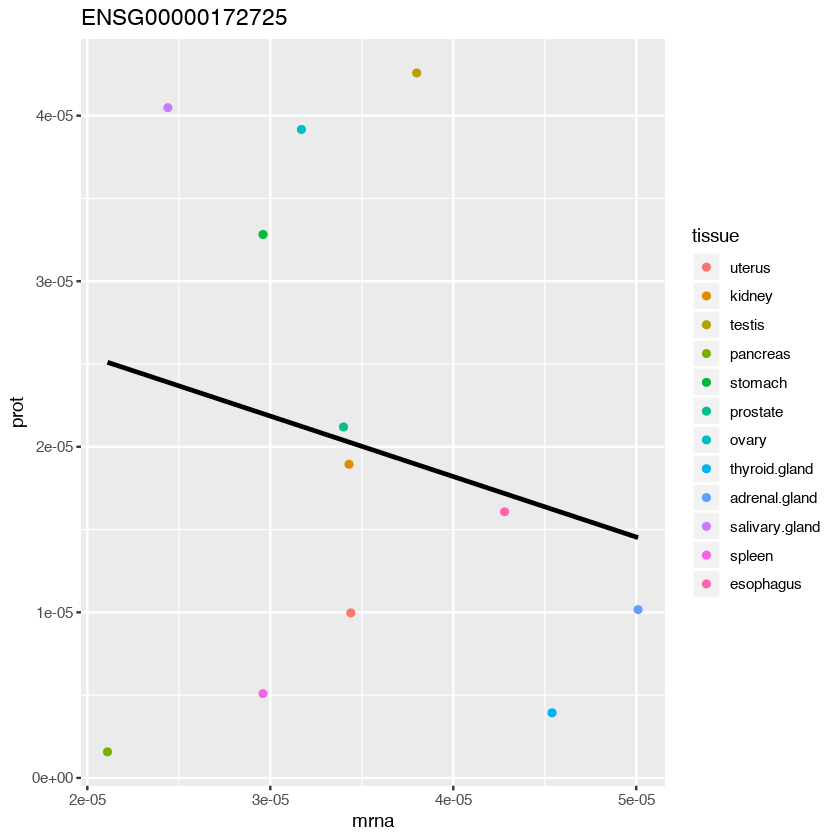

In [76]:
p2 <- ggplot(dat_1,aes(mrna,prot)) + 
        geom_point(aes(mrna,prot,color=tissue),na.rm = T) + ggtitle(paste(g2)) + 
        geom_smooth(method = lm, se = FALSE, na.rm=T, color="black")
p2

# Homework 1

### The rest of this activity will be your first homework! Check Canvas!!

### To do: repeat for a gene with 6 pairs

1. create a dataframe with genes that have *exactly* 6 complete pairs
2. use set.seed(450) and randomly select one gene
3. save the dataframe into dat_3
4. save the plot as p3

### To do: repeat for a gene with 4 pairs

1. create a dataframe with genes that have *exactly* 4 complete pairs
2. use set.seed(450) and randomly select one gene
3. save the dataframe into dat_4
4. save the plot as p4

### Find a suitable scale

1. Combine dat_1 to dat_4 into a common dataframe called dat_plot
2. Try the followin `dplyr` code to find min and max values of both axes

`(lim_plot <- dat_sel  %>% summarize(min_mrna=min(mrna,na.rm =TRUE),
                        max_mrna=max(mrna,na.rm =TRUE),
                        min_prot=min(prot,na.rm =TRUE), 
                        max_prot=max(prot,na.rm =TRUE)))`

### See all plots together on the same scale!

1. Modify the scale of each plot
2. Use `multiplot(p1, p2, p3, p4, cols=2)`